In [1]:
#Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, log_loss
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as m
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

<h1>Part 1</h1>

In [3]:
# Load the dataset
data = pd.read_csv('bioresponse.csv')

X = data.drop('Activity', axis=1)
y = data['Activity']

X_train, X_test, y_train, y_test = train_test_split(X, y.values.ravel(), test_size=0.25, random_state=42)


# Small Decision Tree
small_tree_classifier = DecisionTreeClassifier(max_depth=3)
small_tree_classifier.fit(X_train, y_train)

# Deep Decision Tree
deep_tree_classifier = DecisionTreeClassifier(max_depth=10)
deep_tree_classifier.fit(X_train, y_train)

# Random Forest on Small Trees
small_tree_rf_classifier = RandomForestClassifier(max_depth=3, n_estimators=10)
small_tree_rf_classifier.fit(X_train, y_train)

# Random Forest on Deep Trees
deep_tree_rf_classifier = RandomForestClassifier(max_depth=10, n_estimators=10)
deep_tree_rf_classifier.fit(X_train, y_train)



RandomForestClassifier(max_depth=10, n_estimators=10)

<h1>Part 2</h1>

In [4]:
# Predict using the trained model
y_pred_small_tree = small_tree_classifier.predict(X_test)
y_pred_deep_tree = deep_tree_classifier.predict(X_test)
y_pred_small_tree_rf = small_tree_rf_classifier.predict(X_test)
y_pred_deep_tree_rf = deep_tree_rf_classifier.predict(X_test)

# Calculate accuracy
accuracy_small_tree = accuracy_score(y_test, y_pred_small_tree)
accuracy_deep_tree = accuracy_score(y_test, y_pred_deep_tree)
accuracy_small_tree_rf = accuracy_score(y_test, y_pred_small_tree_rf)
accuracy_deep_tree_rf = accuracy_score(y_test, y_pred_deep_tree_rf)

# Print accuracy scores
print("Accuracy of Small Decision Tree:", accuracy_small_tree)
print("Accuracy of Deep Decision Tree:", accuracy_deep_tree)
print("Accuracy of Random Forest on Small Trees:", accuracy_small_tree_rf)
print("Accuracy of Random Forest on Deep Trees:", accuracy_deep_tree_rf)


Accuracy of Small Decision Tree: 0.7611940298507462
Accuracy of Deep Decision Tree: 0.7334754797441365
Accuracy of Random Forest on Small Trees: 0.746268656716418
Accuracy of Random Forest on Deep Trees: 0.7622601279317697


In [5]:
# Predict probabilities for each model
y_prob_small_tree = small_tree_classifier.predict_proba(X_test)[:, 1]
y_prob_deep_tree = deep_tree_classifier.predict_proba(X_test)[:, 1]
y_prob_small_tree_rf = small_tree_rf_classifier.predict_proba(X_test)[:, 1]
y_prob_deep_tree_rf = deep_tree_rf_classifier.predict_proba(X_test)[:, 1]

In [7]:
# Calculate Precision, recall, accuracy, and F1-score for each model

precision_small_tree = precision_score(y_test, y_pred_small_tree)
recall_small_tree = recall_score(y_test, y_pred_small_tree)
accuracy_small_tree = accuracy_score(y_test, y_pred_small_tree)
F1_score_small_tree = f1_score(y_test, y_pred_small_tree)

precision_deep_tree = precision_score(y_test, y_pred_deep_tree)
recall_deep_tree = recall_score(y_test, y_pred_deep_tree)
accuracy_deep_tree = accuracy_score(y_test, y_pred_deep_tree)
f1_score_deep_tree = f1_score(y_test, y_pred_deep_tree)

precision_small_tree_rf = precision_score(y_test, y_pred_small_tree_rf)
recall_small_tree_rf = recall_score(y_test, y_pred_small_tree_rf)
accuracy_small_tree_rf = accuracy_score(y_test, y_pred_small_tree_rf)
f1_score_small_tree_rf = f1_score(y_test, y_pred_small_tree_rf)

precision_deep_tree_rf = precision_score(y_test, y_pred_deep_tree_rf)
recall_deep_tree_rf = recall_score(y_test, y_pred_deep_tree_rf)
accuracy_deep_tree_rf = accuracy_score(y_test, y_pred_deep_tree_rf)
f1_score_deep_tree_rf = f1_score(y_test, y_pred_deep_tree_rf)


#Log-loss
y_prob_small_tree = small_tree_classifier.predict_proba(X_test)[:, 1]
y_prob_deep_tree = deep_tree_classifier.predict_proba(X_test)[:, 1]
y_prob_small_tree_rf = small_tree_rf_classifier.predict_proba(X_test)
y_prob_deep_tree_rf = deep_tree_rf_classifier.predict_proba(X_test)

log_loss_small_tree_rf = log_loss(y_test, y_prob_small_tree_rf)
log_loss_deep_tree_rf = log_loss(y_test, y_prob_deep_tree_rf)

<h1> Part 3</h1>

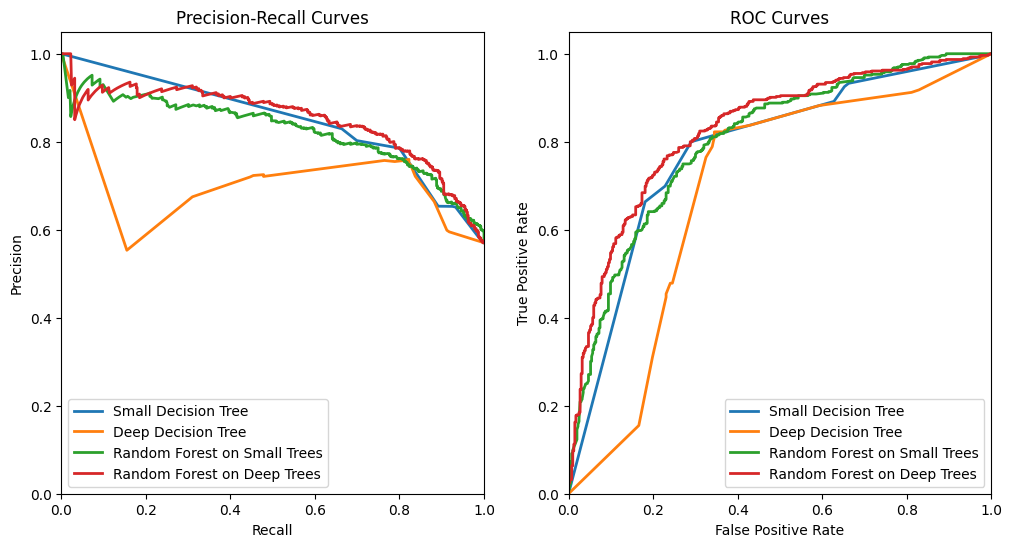

In [39]:
# Calculate precision-recall and ROC curves for different models
y_prob_deep_tree_rf = y_prob_deep_tree_rf[:,]
y_prob_small_tree_rf = y_prob_small_tree_rf[:, ]

# Precision-Recall Curves
precision_small_tree, recall_small_tree, _ = precision_recall_curve(y_test, y_prob_small_tree)
fpr_small_tree, tpr_small_tree, _ = roc_curve(y_test, y_prob_small_tree)

precision_deep_tree, recall_deep_tree, _ = precision_recall_curve(y_test, y_prob_deep_tree)
fpr_deep_tree, tpr_deep_tree, _ = roc_curve(y_test, y_prob_deep_tree)

precision_small_tree_rf, recall_small_tree_rf, _ = precision_recall_curve(y_test, y_prob_small_tree_rf)
fpr_small_tree_rf, tpr_small_tree_rf, _ = roc_curve(y_test, y_prob_small_tree_rf)

precision_deep_tree_rf, recall_deep_tree_rf, _ = precision_recall_curve(y_test, y_prob_deep_tree_rf)
fpr_deep_tree_rf, tpr_deep_tree_rf, _ = roc_curve(y_test, y_prob_deep_tree_rf)

# Create subplots for precision-recall and ROC curves
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Precision-Recall Curves
axes[0].set_title('Precision-Recall Curves')
axes[0].plot(recall_small_tree, precision_small_tree, lw=2, label='Small Decision Tree')
axes[0].plot(recall_deep_tree, precision_deep_tree, lw=2, label='Deep Decision Tree')
axes[0].plot(recall_small_tree_rf, precision_small_tree_rf, lw=2, label='Random Forest on Small Trees')
axes[0].plot(recall_deep_tree_rf, precision_deep_tree_rf, lw=2, label='Random Forest on Deep Trees')
axes[0].set_xlabel('Recall')
axes[0].set_ylabel('Precision')
axes[0].set_xlim([0.0, 1.0])
axes[0].set_ylim([0.0, 1.05])
axes[0].legend(loc='lower left')

# ROC Curves
axes[1].set_title('ROC Curves')
axes[1].plot(fpr_small_tree, tpr_small_tree, lw=2, label='Small Decision Tree')
axes[1].plot(fpr_deep_tree, tpr_deep_tree, lw=2, label='Deep Decision Tree')
axes[1].plot(fpr_small_tree_rf, tpr_small_tree_rf, lw=2, label='Random Forest on Small Trees')
axes[1].plot(fpr_deep_tree_rf, tpr_deep_tree_rf, lw=2, label='Random Forest on Deep Trees')
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_xlim([0.0, 1.0])
axes[1].set_ylim([0.0, 1.05])
axes[1].legend(loc='lower right')

plt.show()


<h1>Part 4</h1>

In [10]:
# Train a classifier and predict probabilities
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)
y_prob = classifier.predict_proba(X_test)[:, 1]

# Define the target recall
target_recall = 0.95

# Initialize the threshold
threshold = 0.5

# Classify instances based on the threshold
y_pred = (y_prob > threshold).astype(int)
current_recall = recall_score(y_test, y_pred)

# Tolerance for threshold adjustment
tolerance = 0.01

# While the recall is less than the target recall, adjust the threshold
while current_recall < target_recall:
    threshold -= tolerance
    y_pred = (y_prob > threshold).astype(int)
    current_recall = recall_score(y_test, y_pred)

# Precision, accuracy, F1-score, and log-loss for the final threshold
precision = precision_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
logloss = log_loss(y_test, y_prob)

print("Target Recall:", target_recall)
print("Achieved Recall:", current_recall)
print("Optimal Threshold:", threshold)
print("Precision:", precision)
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Log-loss:", logloss)

Target Recall: 0.95
Achieved Recall: 0.9514018691588785
Optimal Threshold: 0.34999999999999987
Precision: 0.7302725968436155
Accuracy: 0.7718550106609808
F1 Score: 0.8262987012987012
Log-loss: 0.4562760434349658
